In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\shwet\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
#Reading the data
iris = pd.read_excel("iris.xlsx")
iris.sample(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
68,6.2,2.2,4.5,1.5,versicolor
29,4.7,3.2,1.6,0.2,setosa
70,5.9,3.2,4.8,1.8,versicolor
132,6.4,2.8,5.6,2.2,virginica
57,4.9,2.4,3.3,1.0,versicolor
103,6.3,2.9,5.6,1.8,virginica
49,5.0,3.3,1.4,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
105,7.6,3.0,6.6,2.1,virginica
97,6.2,2.9,4.3,1.3,versicolor


In [3]:
#Size of dataset
print(iris.shape)

(150, 5)


In [4]:
#Checking for missing value
missing_iris = iris.isnull().sum()
print(missing_iris)

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64


* No missing values are observed.

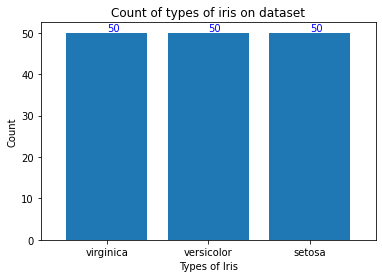

In [5]:
#Let's see how many examples we have of each target variable (each specie)
iris['Species'].value_counts().plot(kind='bar')

#Add count over the bar
ax=iris['Species'].value_counts().plot.bar(width=.8)
for i, v in iris['Species'].value_counts().reset_index().iterrows():
    ax.text(i, v.Species + 0.3, v.Species, color='blue')
    
plt.xticks(rotation='horizontal') #Rotate xticks
plt.xlabel('Types of Iris')
plt.ylabel('Count')
plt.title('Count of types of iris on dataset')
plt.show()

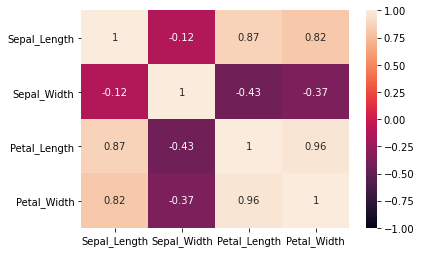

In [6]:
#Pairwise correlation between attributes
sns.heatmap(iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length',
                  'Petal_Width' ]].corr(), vmin = -1, vmax=1, annot=True)
plt.show()

* The pairs Sepal_Length/Petal_Length, Sepal_Length/Petal_Width and Petal_Width/Petal_Length have strong positive relation. No strong negative relations is observed.

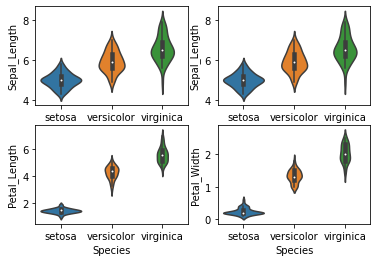

In [7]:
#Plotting the distributions of examples over each class
plt.subplot(221)
sns.violinplot(x = "Species", y = "Sepal_Length", data=iris, size =6)
plt.subplot(222)
sns.violinplot(x = "Species", y = "Sepal_Length", data=iris, size = 6)
plt.subplot(223)
sns.violinplot(x = "Species", y = "Petal_Length", data=iris, size = 6)
plt.subplot(224)
sns.violinplot(x = "Species", y = "Petal_Width", data=iris, size = 6)
plt.show()

* Denser regions are fatter (more examples are in this region) and sparser regions are thinner (fewer examples are here).

C:\Users\shwet\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


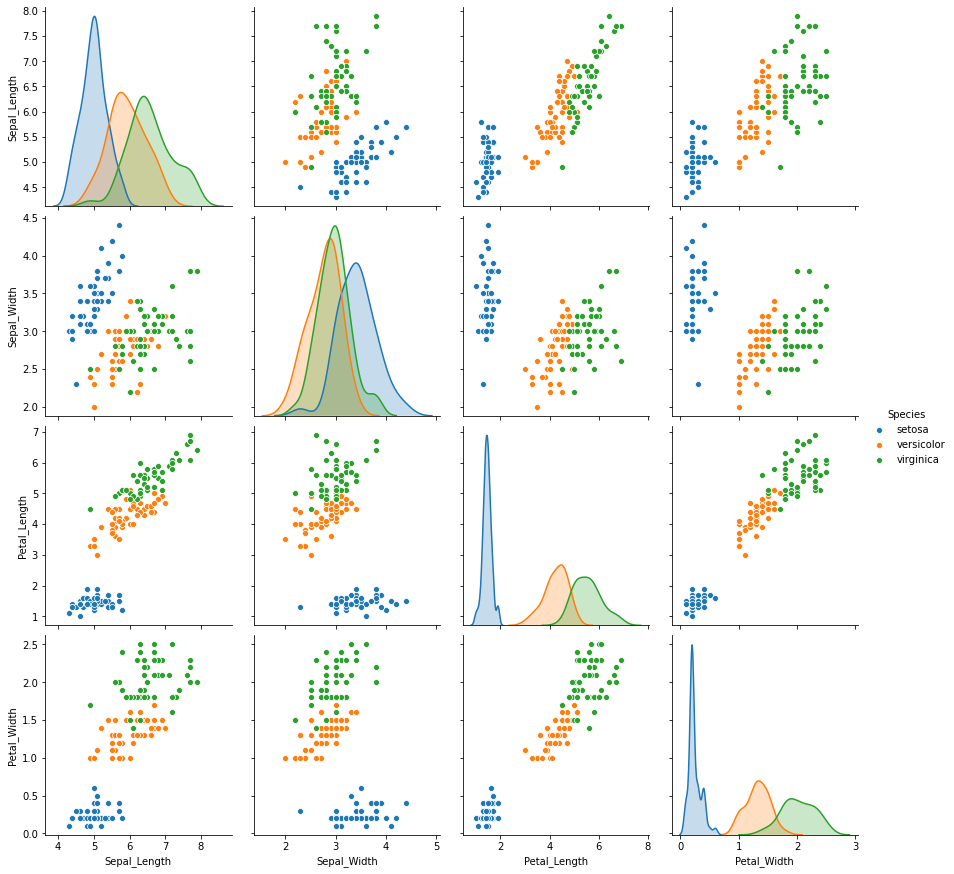

In [8]:
#Plot relationship between pairwise
sns.pairplot(iris, hue="Species", size=3)
plt.show()

* It seems that the blue class (Iris-setosa) is linearly separable from the others. It should be simple and easy to predict a Iris-setosa. The other two can also be divided but there is a blur region where few examples could be classified as any of those two classes.

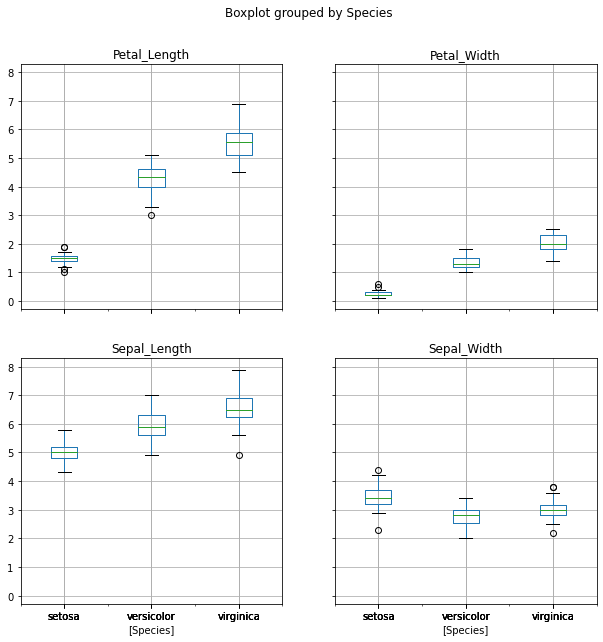

In [9]:
#Boxplot of variables
iris.boxplot(by = "Species", figsize = (10, 10))
plt.show()

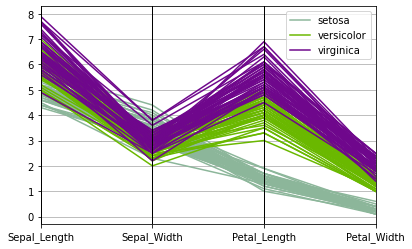

In [10]:
from pandas.plotting import parallel_coordinates
plt.figure()
parallel_coordinates(iris, "Species")

* From the last plot, we can see that PetalLengthCm is a feature that basically distinguish Iris-Setora from the other species.

In [11]:
X = iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width' ]]
y = iris['Species']

In [12]:
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head(20)

0     setosa
1     setosa
2     setosa
3     setosa
4     setosa
5     setosa
6     setosa
7     setosa
8     setosa
9     setosa
10    setosa
11    setosa
12    setosa
13    setosa
14    setosa
15    setosa
16    setosa
17    setosa
18    setosa
19    setosa
Name: Species, dtype: object

In [14]:
#breaks the data into train and test data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 100) 

In [15]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
classifier=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

In [16]:
y_pred

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [18]:
import numpy as np

In [19]:
classifier.predict([[2.2,3.0,4.1,1.5]])

array(['versicolor'], dtype=object)

**THE END**